# Anytime Bottom-Up Rule Learning for Knowledge Graph Completion

Chúng tôi đề xuất một kỹ thuật *anytime bottom-up* để học các quy tắc logic từ các đồ thị tri thức lớn. Chúng tôi áp dụng các quy tắc đã học để dự đoán các ứng cử viên trong bối cảnh hoàn thành biểu đồ thị tri thức. Cách tiếp cận của chúng tôi vượt trội hơn so với các cách tiếp cận dựa trên quy tắc khác và nó cạnh tranh với tình trạng hiện đại, dựa trên các đại diện tiềm ẩn. Bên cạnh đó, cách tiếp cận của chúng tôi nhanh hơn đáng kể, đòi hỏi ít tài nguyên tính toán hơn và đưa ra lời giải thích về các quy tắc đề xuất một ứng cử viên.

## 1 Introduction

Hoàn thành đồ thị tri thức đã trở thành một lĩnh vực nghiên cứu sinh động trong vòng mười năm qua. Trong khi nghiên cứu hiện tại chủ yếu liên quan đến các biểu diễn ẩn dựa trên ý tưởng để nhúng đồ thị tri thức vào không gian vectơ chiều thấp, các phương pháp biểu tượng đã thu hút ít sự chú ý hơn [Wang et al., 2017]. Tuy nhiên, cách tiếp cận như vậy có một lợi thế lớn, đó là khả năng đưa ra lời giải thích theo các quy tắc *trigger a prediction* (kích hoạt dự đoán)

Trong bài báo này, chúng tôi đề xuất một kỹ thuật từ dưới lên để học hiệu quả các quy tắc logic từ các biểu đồ tri thức lớn. Công việc của chúng tôi được truyền cảm hứng từ cách tiếp cận học tập theo quy tắc từ dưới lên Golem [Muggleton và Feng, 1990] và Aleph [Srinivasan, 2000], đã được phát triển trong những ngày đầu của *Inductive Logic Programming* (ILP). Cách tiếp cận từ dưới lên dựa trên ý tưởng rằng một ví dụ là một biểu diễn nhỏ gọn của một quy tắc rất cụ thể có thể được khái quát hóa để nắm bắt một tập hợp con toàn diện của tất cả các **positive examples**. Aleph là một trong những cách tiếp cận như vậy. Nó biến đổi một *positive examples* nhất định thành quy tắc **Horn** được gọi là quy tắc dưới cùng. Quy tắc này sau đó được khái quát hóa bằng cách bỏ các *atoms* khỏi cơ thể quy tắc cho đến khi tìm thấy quy tắc đáp ứng tiêu chí chất lượng đã chọn. Các ví dụ được bao phủ bởi quy tắc được loại bỏ và cách tiếp cận được áp dụng lại cho đến khi tất cả các ví dụ được học

Cách tiếp cận của chúng tôi khác nhau theo nhiều cách. Trước hết, chúng ta không có một biên giới nghiêm ngặt cho chúng ta biết những quan sát nào thuộc về một ví dụ cụ thể và những gì không thuộc về nó. Thay vào đó, chúng ta phải quyết định những gì để coi là một ví dụ. Chúng tôi dựa trên khái niệm về một ví dụ về khái niệm đường dẫn. Theo nghĩa đó, cách tiếp cận của chúng tôi tương tự như thuật toán xếp hạng đường dẫn (PRA) [Lao et al., 2011]. Tuy nhiên, PRA coi các đặc trưng chỉ là một tập hợp con của các quy tắc mà chúng ta có thể tìm hiểu.

Thứ hai, chúng tôi quan tâm đến việc học các quy tắc không chắc chắn, tức là các quy tắc bao gồm ít nhất một số ví dụ đúng và thường là một số ví dụ sai. Ngay cả một quy tắc với độ tin cậy thấp vẫn có thể giúp chúng ta tạo ra thứ hạng ứng viên tốt hơn cho nhiệm vụ hoàn thành đồ thị tri thức. Hơn nữa, chúng tôi không thể xóa các ví dụ được quy định bởi một quy tắc, bởi vì có thể có các quy tắc khác cũng bao gồm (một số) các ví dụ này và các ví dụ khác, với điểm tin cậy khác nhau.

Thứ ba, thuật toán của chúng tôi được thiết kế để trở thành một công cụ khai thác quy tắc hiệu quả cho các đồ thị tri thức. Trong một biểu đồ tri thức, tất cả các sự kiện (còn được gọi là bộ ba) kết quả từ các vị từ nhị phân nối đất với các hằng số. Do đó, một đồ thị tri thức có thể được giải mã thành một tập hợp các đường dẫn có nhãn cạnh. Đây là lý do chính tại sao nó có ý nghĩa để tập trung vào các đường dẫn trong trường hợp không có các vị từ đơn vị hoặc các vị từ $n-ary$ với $n ≥ 3$.

Vấn đề hoàn thành biểu đồ tri thức (hoặc dự đoán liên kết) hiện đang bị chi phối bởi các phương pháp nhúng biểu đồ tri thức đã cho vào một không gian đặc trưng ẩn. Học một **đại diện biểu tượng** rõ ràng hiếm khi được đề xuất thay thế. Điều này có thể liên quan đến giả định cơ bản rằng một cách tiếp cận dựa trên quy tắc không thể giải quyết nhiều hơn chỉ là một tập hợp con tầm thường. Xem, ví dụ như cuộc thảo luận về mô hình nghịch đảo được đề xuất trong [Dettmers et al., 2018] và các nhà phê bình liên quan đến sự dư thừa trong FB15k [Toutanova và Chen, 2015]. Một giả định khác có thể là việc học quy tắc không thể được áp dụng cho các bộ dữ liệu lớn. Vì lý do đó, nghiên cứu hiện tại có liên quan đến sự kết hợp của các quy tắc và nhúng (ví dụ: [Guo et al., 2018]). Chúng tôi lập luận rằng các giả định cơ bản là sai và đưa ra kết quả hỗ trợ cho yêu cầu của chúng tôi. Cụ thể, chúng tôi đề xuất một thuật toán từ dưới lên bất cứ lúc nào để học các quy tắc và áp dụng phương pháp của chúng tôi vào nhiệm vụ hoàn thành kiến ​​thức. Chúng tôi trình bày kết quả cho năm bộ dữ liệu khác nhau. Ba trong số chúng đã được đề xuất là trường hợp khó cho các phương pháp đơn giản (dựa trên quy tắc) tận dụng các đối xứng và các dự phòng khác. Cách tiếp cận của chúng tôi thực hiện tốt như và đôi khi tốt hơn hầu hết các mô hình đã được đề xuất gần đây. Kết quả của phương pháp của chúng tôi vẫn rất tốt nếu chúng tôi dừng thuật toán đã có sau một khoảng thời gian ngắn. Hơn nữa, các tài nguyên cần thiết về bộ nhớ và thời gian chạy nhỏ hơn đáng kể so với các tài nguyên được yêu cầu bởi các phương pháp dựa trên đặc trưng ẩn.

## 2 Language Bias

Đồ thị tri thức $G$ được xác định trên top từ vựng $C, R$ trong đó $C$ là tập hợp các hằng số và $R$ là tập hợp các vị từ nhị phân. Do đó, $G = {r(a, b) \in R | r ∈ R, \ \ \ a, b \in C}$ là tập hợp các *atoms or facts*. Một vị từ nhị phân được gọi là quan hệ và hằng số (hoặc hằng số đề cập đến) cũng được gọi là thực thể **entity**. Sau đây chúng tôi sử dụng các chữ cái viết thường cho các hằng và chữ in hoa cho các biến. Vì chúng ta không học các quy tắc Horn tùy ý, nên có Language Bias (sự thiên vị ngôn ngữ) đối với loại quy tắc nào có thể được học như được thảo luận dưới đây.

Chúng ta gọi một quy tắc là $h (c_0, c_1) \gets b_1 (c_1, c_2), ..., b_n(c_n, c_n + 1)$ là quy tắc đường dẫn có độ dài $n$.$head$ của quy tắc là $h (...)$ và $b_1(...)$ thông qua $b_n(...)$ là $body$ của nó. Chúng ta nói rằng quy tắc đường dẫn là thẳng nếu $c_k \ne c_l$ cho $l, k \in \{1, ..., n\}$ với $l \ne k$ và nếu $c_0 \ne c_k$ với $0 < k < n + 1$. Như vậy quy tắc không có chu kỳ trong đường đi. Trong chính thức hóa của chúng tôi, chúng tôi trừu tượng từ thứ tự của các biến theo nghĩa mà chúng tôi xem xét cũng quy tắc với các biến đảo mà không viết chúng rõ ràng. Quy tắc đường đi thẳng có thể được chia thành **cyclic rules** (quy tắc tuần hoàn) với $c_0 = c_n + 1$ và **acyclic rules** (quy tắc chu kỳ) với $c_0 \ne c_n + 1$. Chúng tôi lập luận rằng bất kỳ khái quát hóa hữu ích nào từ quy tắc đường đi thẳng có độ dài $n$, cũng không phải là khái quát hóa của quy tắc đường dẫn ngắn hơn hoặc khái quát hóa quy tắc đường dẫn không thẳng, thuộc một trong ba loại $AC_1$, $AC_2$ hoặc $C$ được định nghĩa dưới đây. Chúng tôi sử dụng $X$ và $Y$ cho các biến xuất hiện trong **head** (đầu), trong khi $A_i$ là biến chỉ xuất hiện trong **body**.

* $AC_1$ <pre> $h(c_0, X) \gets b_1(X, A_2), ..., b_n(A_n, c_{n+1})$
* $AC_2$  <pre>   $h(c_0, X) \gets b_1(X, A_2), ..., b_n(A_n, A_{n+1})$
* $C$   <pre>    $h(Y, X) \gets b_1(X, A_2), ..., b_n(A_n, Y )$

* Quy tắc $AC_2$ là khái quát của quy tắc đường đi theo chu kỳ
* quy tắc $C$ là khái quát hóa quy tắc đường đi vòng theo chu kỳ, 
* trong khi quy tắc $AC_1$ có thể được khái quát từ cả hai chu kỳ (với $c_0 = c_n + 1$) và quy tắc theo chu kỳ (với $c_0 \ne c_n + 1$).

Bất kỳ quy tắc nào cụ thể hơn quy tắc thuộc ba loại này phải có hằng số $c_k$ với $k < n + 1$ thay vì biến $A_k$. Đối với các loại $AC_1$ và $AC_2$, chúng ta phải phân biệt hai trường hợp:

1. Sự kết hợp của các **body atoms** $b_k(...)$ với $b_n(...)$ đánh giá là đúng và do đó chúng có thể được loại bỏ khỏi quy tắc. Trong trường hợp này, quy tắc cũng có thể được tạo từ một đường dẫn dài hơn $k$. Sau này sẽ được làm rõ rằng chúng ta học quy tắc này trong một lần lặp trước của thuật toán tổng thể.
2. Sự kết hợp của các **atoms** $b_k (...)$ với $b_n (...)$ luôn luôn đánh giá là sai, dẫn đến một quy tắc không bao giờ kích hoạt.

Đối với loại $C$, **constant** $c_k$ sẽ chia quy tắc thành hai phần trong đó một phần có liên quan đến $X$ và phần khác có liên quan đến $Y$. Một quy tắc như vậy cũng có thể đã được tạo ra như là sự khái quát hóa của quy tắc $h (c_0, c_1) \gets b_1 (c_1, c_2), ..., b_{k-1}(c_{k− 1}, c_k), b^{− 1}_n (c_0, c_n), ..., b^{-1}_k (c_k + 1, c_k)$. Do đó, chúng tôi sẽ tạo ra một quy tắc có một **rule body** là sự kết hợp của các **bodies** (phần) của hai quy tắc ngắn hơn.

Một tập hợp con nhỏ của đồ thị tri thức $G$ được hiển thị trong Hình 1. Giả sử rằng chúng ta quan tâm đến việc tìm các quy tắc giải thích tại sao $Ed$ nói tiếng Hà Lan, tương ứng với **fact** ***speaks(ed, d)***. Để xây dựng các quy tắc hữu ích, chúng tôi xem xét tất cả các đường dẫn có độ dài $n$ bắt đầu từ $ed$ hoặc $d$. Sau này chúng tôi sẽ giải thích rằng chúng tôi tạo quy tắc độ dài $n$ cho đến khi đạt được một mức độ bão hòa nhất định, trước khi chúng tôi tiếp tục với $n + 1$. Lưu ý rằng chúng ta cho phép một đường dẫn được xây dựng bằng cách đi theo các cạnh vào và ra. Chúng tôi đã đánh dấu ba đường dẫn bắt đầu từ $ed$ trong Hình 1. Hai trong số các đường dẫn này là các đường dẫn tuần hoàn kết thúc ở đâu đó trong đồ thị tri thức, trong khi đường dẫn thứ ba, cùng với ***speaks(ed, d)*** *cyclic* tuần hoàn. Quy tắc (1), (2) và (3) là các quy tắc dưới cùng phải được khái quát hóa.

* (1) $ speaks(ed, d) ← born(ed, a)$ 
* (2) $ speaks(ed, d) ← married(ed, lisa), born(lisa, a) $ 
* (3) $ speaks(ed, d) ← lives(ed, nl), lang(nl, d) $ 

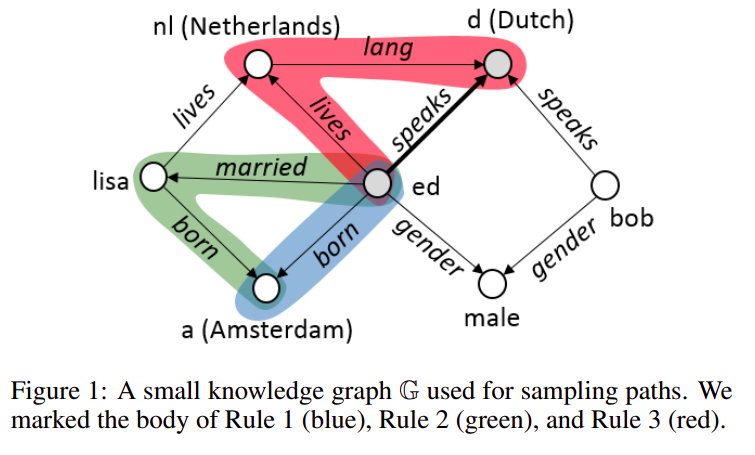

In [1]:
from IPython.display import Image
Image(filename='../images/AnyBURLFigure_1.png')

Chúng tôi lập luận ở trên rằng bất kỳ quy tắc hữu ích nào, đáp ứng các tiêu chí được đề cập ở trên, là một trong ba loại. Vì vậy, chúng ta có thể trực tiếp khởi tạo các loại này thay vì xây dựng một mạng tổng quát hóa hoàn chỉnh. Chúng ta liệt kê trong tất cả các quy tắc sau đây do việc khái quát hóa Quy tắc 2 và Quy tắc 3.

* (4) $speaks(X, d) \gets married(X, A_2), born(A_2, a)$ 
* (5) $speaks(X, d) \gets married(X, A_2), born(A_2, A_3)$ 
* (6) $speaks(X, Y ) \gets lives(X, A_2), lang(A_2, Y )$ 
* (7) $speaks(X, d) \gets lives(X, A_2), lang(A_2, d)$
* (8) $speaks(ed, Y ) \gets lives(ed, A_2), lang(A_2, Y )$ 

Rõ ràng, Quy tắc 6 chung chung hơn Quy tắc 7. Điều này có nghĩa là Quy tắc 6 luôn luôn kích hoạt nếu Quy tắc 7 kích hoạt. Tuy nhiên, các quy tắc có thể có điểm khác nhau. Vì lý do đó, nó có ý nghĩa để sử dụng cả hai quy tắc trong giai đoạn dự đoán.

Độ tin cậy của một quy tắc thường được định nghĩa là **number of body groundings**, chia cho số lượng các **body groundings** làm cho *** head true***. Lưu ý rằng chúng tôi tính theo các ***head groundings***, ví dụ: chúng tôi đếm số lượng căn cứ $\langle X, Y \rangle$ khác nhau theo Quy tắc $6$ và số lượng căn cứ $X$ khác nhau đối với Quy tắc $7$. Một số sửa đổi tinh tế của định nghĩa cơ bản đã được được giới thiệu để đối phó với thông tin còn thiếu, ví dụ: độ tin cậy của PCA [Galarraga ơi và cộng sự, 2013] hoặc các chức năng chấm điểm nhận thức đầy đủ [Tanon et al., 2017]. Trong bài báo này, chúng tôi tuân theo định nghĩa tiêu chuẩn, với một sửa đổi nhỏ về làm mịn phụ gia được giải thích sau. Để tính toán độ tin cậy chính xác có thể tốn kém, bởi vì nó đòi hỏi phải thực hiện nhiều lần tham gia tùy thuộc vào số lượng ***number of body atoms***. Vì lý do đó, chúng tôi chỉ lấy mẫu ***only sample
body groundings***, mà chúng tôi tính toán các ***respective head groundings*** tương ứng. Do đó, độ tin cậy được tính toán là một xấp xỉ của độ tin cậy chính xác.

## 5 Experiments

Chúng tôi đã sử dụng trong các thử nghiệm của mình bộ dữ liệu FB15 (k), biến thể FB15-237, WN18, biến thể WN18RR đã sửa đổi của nó và YAGO03-10 (viết tắt là YAGO). Các bộ dữ liệu FB (WN) dựa trên tập hợp con FreeBase (WordNet). FB15 và WN18 đã được sử dụng lần đầu tiên trong [Bordes et al., 2013]. Họ đã bị chỉ trích trong một số bài báo: do dư thừa, một phần lớn các mẫu thử có thể được giải quyết bằng cách khai thác các quy tắc khá đơn giản. Cả FB15-237 [Toutanova và Chen, 2015] và WN18RR [Dettmers et al., 2018] đã được đề xuất là các biến thể sửa đổi trong đó các khoản dự phòng đã bị loại bỏ. FB15-237 thậm chí còn tiến thêm một bước. Nó không chứa các trường hợp thử nghiệm có thể được giải quyết bằng các quy tắc C với một nguyên tử cơ thể, mặc dù tập huấn luyện cho thấy các quy tắc tạo ra các quy tắc này. Điều này làm cho FB15-237 hơi phi thực tế và là một thử nghiệm khó khăn cho cách tiếp cận dựa trên quy tắc. Bộ dữ liệu YAGO đã được sử dụng trong [Dettmers et al., 2018] dưới dạng tập dữ liệu bổ sung. Tổng quan về các bộ dữ liệu được đưa ra trong Bảng 1. Các số được báo cáo trong ba dòng đầu tiên đề cập đến tập huấn luyện. Dòng cuối cùng đề cập đến số lượng bộ ba trong bộ thử nghiệm. Mỗi bộ ba thử nghiệm có thể được chia thành hai trường hợp thử nghiệm. Xét về bộ ba và thực thể (hằng số) YAGO03-10 là tập dữ liệu lớn nhất.

Như trong [Bordes et al., 2013] chúng tôi tính toán các lần truy cập được lọc @ 1 và các lần truy cập được lọc @ 10. Sau đây chúng tôi chỉ đơn giản đề cập đến các giá trị này mà không có tính từ Bộ lọc được lọc. Chúng tôi không tính toán chính xác MRR được lọc (có nghĩa là đối ứng xếp hạng-**mean rank reciprocal**), vì cách tiếp cận của chúng tôi không được thiết kế để tính toán thứ hạng hoàn chỉnh mà chỉ xếp hạng top-k. Thay vì tính toán giá trị chính xác, chúng tôi giả định rằng bất kỳ ứng cử viên nào được xếp hạng ở vị trí> k không phải là một dự đoán chính xác. Điều này dẫn đến giới hạn dưới của MRR được lọc, mà chúng tôi trình bày trong Bảng 2 có tiền tố ≥. Giá trị chính xác thường cao hơn một chút. Chúng tôi đã đặt tên cho phương pháp tiếp cận của chúng tôi là AnyburL (Học quy tắc từ dưới lên bất cứ lúc nào). AnykinaL được viết bằng Java và không yêu cầu các thư viện bên ngoài. Mã nguồn và bộ dữ liệu, được sử dụng trong các thử nghiệm, có thể được tìm thấy tại http: // web. informationatik.uni-mannheim.de/AnykinaL/. Chúng tôi đã tiến hành tất cả các thử nghiệm của mình trên một máy ảo với 4 lõi (mỗi lõi 2400 MHz) và RAM 16 GB.

Chúng tôi chưa sử dụng các bộ xác thực để tìm cài đặt tham số cụ thể cho tập dữ liệu. Đối với tất cả các thử nghiệm của chúng tôi, chúng tôi đã sử dụng chính xác cùng một cài đặt tham số. Chúng tôi đã chọn tiêu chí chất lượng Q để chỉ cho phép những quy tắc tạo ra ít nhất hai dự đoán chính xác, đó là tiêu chí rất lỏng lẻo. Chúng tôi đã đặt tỷ lệ bão hòa yêu cầu sat đến 99%. Chúng tôi đặt ts = 1 giây, pc = 5 và s = ​​500, đây là cỡ mẫu xác định độ chính xác của giá trị độ tin cậy. Như cài đặt mặc định, chúng tôi đã sử dụng chiến lược tổng hợp tối đa. Chúng tôi cũng đã tiến hành một thử nghiệm trong đó chúng tôi so sánh chiến lược này với tập hợp Không gây ồn ào. Chúng tôi đã thực hiện hai sửa đổi thêm. Việc triển khai của chúng tôi xen kẽ giữa các khoảng thời gian trong đó chúng tôi chỉ lấy mẫu các đường dẫn tuần hoàn; và khoảng thời gian nơi chúng ta lấy mẫu tất cả các đường dẫn có thể. Điều này cho phép sử dụng một thuật toán tìm chu kỳ hiệu quả hơn. Hơn nữa, chúng tôi đã dừng tìm kiếm một cách rõ ràng các đường dẫn tuần hoàn một khi chúng tôi đạt đến độ bão hòa được xác định cho các quy tắc C có độ dài 3, bởi vì các quy tắc tuần hoàn dài hơn có thể rất tốn kém về thời gian chạy.

### 5.1 Anytime Behavior and Runtime
Chúng ta phải phân biệt giữa thời gian cần thiết để tìm hiểu các quy tắc và thời gian áp dụng chúng để giải quyết công việc. Rõ ràng, chúng ta càng dành nhiều thời gian cho việc học, chúng ta càng học được nhiều quy tắc hơn; và chúng ta càng học nhiều quy tắc, thời gian cần thiết để áp dụng các quy tắc này sẽ càng lâu. Kết quả lần $Hits@1$ và kết quả lần $hits@10$ được chỉ định cho tất cả năm bộ dữ liệu trong Bảng 2 dựa trên các bộ quy tắc đã được học sau $10, 100, 1000$ và $10000$ giây. Đối với tất cả các bộ dữ liệu, chúng tôi quan sát một mô hình tương tự. Kết quả đã tốt đáng ngạc nhiên sau một giai đoạn học tập $10$ giây. Đối với các bộ dữ liệu nhỏ hơn ($WN18$ và $WN18RR$), các kết quả này đã tốt như trạng thái hiện tại của kết quả hiện đại. Khi chúng tôi tìm hiểu các quy tắc trong $100$ và $1000$ giây (chưa đến nửa giờ), kết quả sẽ được cải thiện hơn nữa và sự cải thiện này cao hơn đối với các bộ dữ liệu lớn hơn.

**Learning rules** trong một thời gian dài ($10000$ giây) có thể có tác động hơi tiêu cực đến kết quả. Điều này đặc biệt là trường hợp cho các bộ dữ liệu WN18 và FB15. Các bộ dữ liệu này bị chi phối bởi các liên kết dự phòng được phản ánh trong các quy tắc $C$ có độ dài $1$. Các quy tắc này có thể được tìm thấy nhanh chóng ngay từ đầu. Nếu chúng ta học lâu hơn, có thể xảy ra rằng có một số quy tắc rất cụ thể trong số rất lớn các quy tắc đã học tạo ra nhiễu. Tuy nhiên, xu hướng này không tiếp tục nếu chúng ta chạy công cụ lâu hơn nữa. Chúng tôi cũng đã chạy AnyburL trên WN18 và FB15 trong $20000$ giây và gần như không có sự khác biệt so với kết quả được báo cáo cho lần chạy $10000$ giây (ví dụ, WN18 thay đổi từ 95,42 thành 95,40).

Đối với YAGO, chúng tôi cho thấy (i) tác động của thời gian học đến chất lượng kết quả (trục $y$ ở bên trái), (ii) thời gian cần thiết để áp dụng các quy tắc đã học (chiếu cho trục $x$) và (iii) số quy tắc đã được học (đường màu tím, trục $y$ ở bên phải). Thời gian ứng dụng, tham chiếu đến bộ thử nghiệm đầy đủ, được hiển thị dưới dạng hình chiếu cho trục $x$. Ví dụ: học các quy tắc trong $10$ giây, kết quả là số lần $hits@10$ là $55,3\%$ và một bộ quy tắc bao gồm $4531$ quy tắc. Nó đòi hỏi $42$ giây để áp dụng quy tắc này được đặt cho $5000$ trường hợp thử nghiệm của bộ dữ liệu. Lưu ý rằng trục $x$ và trục $y$ ở bên phải sử dụng thang đo logarit *logarithmic scale*.

Hình 2 cho thấy AnykinaL bắt đầu ở mức cao và cải thiện kết quả về mặt hàm logarit. Tập hợp các quy tắc đã học dường như phát triển gần như tuyến tính với mức giảm nhẹ khi chúng ta chạy AnyburL lâu hơn. AnyburL đạt đến độ bão hòa $0,99$ cho quy tắc $C$ có độ dài $3$ sau $84$ giây, trong khi độ bão hòa cho quy tắc $AC_1$ và $AC_2$ có độ dài $1$ không đạt được trong khoảng thời gian chung là $30000$ giây. Điều này rõ ràng là do số lượng hằng số cao trong bộ dữ liệu YAGO. Điều này chỉ ra rằng các kết quả tốt đạt được trong thời gian ngắn chủ yếu dựa trên các quy tắc $C$, trong khi các cải tiến nhỏ nhưng ổn định tuân theo các quy tắc $AC_1$ và $AC_2$.

Thời gian áp dụng các quy tắc dành cho các bộ quy tắc nhỏ nhiều hơn thời gian cần thiết để tìm hiểu chúng trên toàn bộ bộ kiểm tra. Tuy nhiên, nếu các quy tắc được đặt lớn hơn thì cần ít thời gian hơn để dự đoán. Một bộ quy tắc được học trong $1000$ giây, cũng cần khoảng $1000$ giây để được áp dụng. Đối với các quy tắc lớn hơn, thời gian học chiếm ưu thế trong thời gian áp dụng. Cũng lưu ý rằng thời gian ứng dụng nhỏ hơn đối với bốn bộ dữ liệu khác.



Thời gian áp dụng các quy tắc dành cho các bộ quy tắc nhỏ cao hơn thời gian cần thiết để tìm hiểu chúng trên toàn bộ bộ kiểm tra. Tuy nhiên, nếu các quy tắc được đặt lớn hơn thì cần ít thời gian hơn để dự đoán. Một bộ quy tắc được học trong 1000 giây, cũng cần khoảng 1000 giây để được áp dụng. Đối với các quy tắc lớn hơn, thời gian học chiếm ưu thế trong thời gian áp dụng. Cũng lưu ý rằng thời gian ứng dụng nhỏ hơn đối với bốn bộ dữ liệu khác.

## 5.2 Comparison with Other Approaches

Khối đầu tiên trong Bảng $2$ liệt kê các kết quả hiện trạng của các kỹ thuật *art completion techniques using embeddings*. Chúng tôi đã chọn năm mô hình, đạt được kết quả rất tốt và đã được công bố trong năm ngoái tại các hội nghị hàng đầu. Các kết quả mà $AnyburL$ đạt được sau giai đoạn học $1000$ giây ở cùng cấp độ và đôi khi tốt hơn một chút so với hầu hết các mô hình này. Ví dụ, $AnyburL$ có lượt truy cập tốt hơn $hits@1, hits@10,$ và kết quả $MMR$ so với $ConvE$ $Dettmers et al., 2018$ trên tất cả các bộ dữ liệu ngoại trừ FB15-237, trong đó kết quả của $AnyburL$ chỉ kém hơn một chút. $AnyburyL$ vượt trội so với SimplE [Kazemi và Poole, 2018] đã có khi sử dụng các quy tắc đã được học sau 10 giây.

Ngoại lệ, mô hình ComplEx-N3 (đối ứng) được đề xuất trong [Lacroix et al., 2018], ban đầu được giới thiệu trong [Trouillon et al., 2016], đạt được kết quả tốt hơn bất kỳ mô hình nào khác bao gồm $AnyBURL$. Mô hình này yêu cầu $485$ giây $\times 25$ epoch ($100$ epoch) = $12125 (48500)$ giây cho một lần chạy với một bộ siêu tham số cố định trên YAGO. Khoảng một nửa thời gian cần thiết cho FB15.1 Các tham số siêu được xác định trong tìm kiếm lưới trên $28$ kết hợp, trong trường hợp xấu nhất phải nhân với $28$, tức là $28 \times 12125 = 339500$ 4 ngày, ngay cả khi dừng sớm tiêu chí có thể tiết kiệm nỗ lực. Mặc dù chúng tôi đã chạy $AnyburL$ trên một máy tính xách tay tiêu chuẩn, thời gian chạy của ComplEx-N3 dựa trên việc sử dụng GPU Quadro GP100.

Khối thứ hai trong Bảng 2 trình bày kết quả cho hai hệ thống học quy tắc thay thế được gọi là RuleN và AMIE +. AMIE + sử dụng cách tiếp cận từ trên xuống hoàn chỉnh và xu hướng ngôn ngữ tương tự như RuleN. Trong xu hướng ngôn ngữ của nó, nó xây dựng tất cả các quy tắc có độ dài nhất định bằng cách sử dụng ngưỡng hỗ trợ làm cơ chế cắt tỉa. $RuleN$ học các quy tắc $C$ và một loại quy tắc không đổi khá cụ thể. Nó sử dụng các kỹ thuật lấy mẫu tương tự nhưng ít tổng quát hơn so với phương pháp chúng tôi đề xuất. Cả hai hệ thống đã được thực thi trong [Meilicke et al., 2018] trong một môi trường tương tự như chúng ta. Không có hệ thống nào có hành vi bất cứ lúc nào, tuy nhiên, các tham số đã được chọn tập dữ liệu cụ thể để khai thác khung thời gian $10$ giờ tốt nhất có thể. Do đó, các kết quả gần như tương đương với kết quả $10000$s của $AnyBURL$. Với ngoại lệ nhỏ của bộ dữ liệu WN18,  $AnyBURL$ tạo ra kết quả tốt hơn đáng kể so với AMIE và RuleN. Đối với RuleN, điều này có một phần liên quan đến việc nó không có khả năng học các quy tắc nhất định. Những cải tiến so với AMIE có lẽ liên quan đến chiến lược lấy mẫu được sử dụng trong phương pháp tiếp cận từ dưới lên. RLvLR [Omran et al., 2018] là một người học quy tắc sử dụng các nhúng để hướng dẫn quy trình trích xuất quy tắc để giảm không gian tìm kiếm. Đối với phương pháp tiếp cận này, kết quả chỉ có sẵn cho FB15-237, trong đó RLvLR đạt được lượt $hits@10$ trên $39,3\%$ và MMR là $0,24$. Những kết quả này tương tự với kết quả của AMIE và RuleN.

Ở hàng cuối cùng, chúng tôi so sánh tổng hợp **Noisy-Or showing the difference Noisy-Or minus Maximum**. Các con số dựa trên việc áp dụng các quy tắc đã học sau 1000 giây. Tiếng ồn - Hoặc thực hiện trên gần như tất cả các bộ dữ liệu rõ ràng tồi tệ hơn. Chúng tôi quan sát mức giảm cao nhất trên các bộ dữ liệu WN18 và FB15. Cả hai bộ dữ liệu đều chứa nhiều dự phòng và kết quả là một ứng cử viên có thể được đề xuất bởi một số quy tắc phụ thuộc rất cao (tương đương), làm sai lệch thứ hạng ứng viên được tạo.

## 6 Related Work
Chúng tôi đã thảo luận về AMIE và RuleN trong phần trên. RuDiK [Ortona et al., 2018], một ví dụ cho một người học quy tắc khác, có thể học cả quy tắc tích cực và tiêu cực (ràng buộc). Trái với cách tiếp cận của chúng tôi, RuDiK được thiết kế để tìm ra một bộ quy tắc nhỏ bao gồm phần lớn các ví dụ tích cực và càng ít tiêu cực càng tốt. Điều này khác với mục tiêu của chúng tôi, nơi chúng tôi cố gắng tìm hiểu mọi quy tắc có thể có liên quan để tạo thứ hạng ứng cử viên hàng đầu.

Thuật toán xếp hạng đường dẫn [Lao et al., 2011] dựa trên các đường dẫn lấy mẫu tương ứng với quy tắc C. Trong khi kỹ thuật lấy mẫu của AnykinaL được lấy cảm hứng từ phương pháp này, AnykinaL có thể học được nhiều quy tắc biểu cảm hơn PRA. Trong [Lao et al., 2015] các tác giả đã đề xuất một phần mở rộng, cũng có thể xử lý các trường hợp (hằng số). Tuy nhiên, các quy tắc được hỗ trợ bởi tiện ích mở rộng này tương tự như kết hợp các quy tắc AC1 có độ dài 1 và quy tắc C có độ dài tùy ý, trong khi AC1 và AC2 tự chúng không được hỗ trợ. Chúng tôi đã lập luận ở trên rằng sự kết hợp như vậy sẽ dẫn đến một không gian tìm kiếm lớn hơn đáng kể, điều mà chúng tôi cố gắng tránh với sự thiên vị ngôn ngữ nghiêm ngặt.

Một cách tiếp cận thú vị khác là các mô hình Gaifman [Niepert, 2016], nơi các khu phố được lấy mẫu thay vì đường dẫn. Mặc dù về nguyên tắc cho phép học mọi quy tắc có thể (nếu vùng lân cận đủ lớn), ứng dụng mà các tác giả báo cáo dựa trên sự thiên vị ngôn ngữ khá hạn chế chỉ bao gồm một phần nhỏ các quy tắc mà chúng ta học. Chúng tôi đã giới thiệu một thiên vị ngôn ngữ và một kỹ thuật lấy mẫu hiệu quả được kết hợp chặt chẽ, trong khi lấy mẫu trong bối cảnh các mô hình Gaifman là một phương tiện để tạo ra các ví dụ phù hợp (về nguyên tắc) chống lại mọi sai lệch ngôn ngữ.

Phần lớn các phương pháp tiếp cận hiện tại để hoàn thành biểu đồ tri thức được dựa trên khái niệm nhúng. Ngoài ra còn có một nhóm các phương pháp tiếp cận cố gắng kết hợp các quy tắc nhúng và quy tắc (xem [Wang et al., 2017] để khảo sát). Một ví dụ là RLvLR [Omran et al., 2018], trong đó chúng tôi đã thêm một số kết quả ở trên và hệ thống Ruge [Guo et al., 2018], sử dụng các quy tắc đã học để đưa các ví dụ đào tạo mới với nhãn mềm vào quy trình học nhúng. Các tác giả báo cáo về kết quả cho FB15, kém hơn so với kết quả học tập 100 giây của AnyburL. Chúng tôi tin rằng lợi ích của việc kết hợp các quy tắc và nhúng chỉ có thể được hiểu, nếu chúng ta biết trước tiên người ta có thể đi được bao xa với mỗi phương thức. Với công việc của chúng tôi, chúng tôi cho thấy rằng các quy tắc tự thực hiện tốt đáng ngạc nhiên, không nên bỏ qua các công việc tiếp theo trong việc kết hợp các quy tắc nhúng và quy tắc.

## 7 Conclusion
Chúng tôi đã đề xuất một thuật toán bất cứ lúc nào để học các quy tắc từ các biểu đồ tri thức bằng cách làm theo mô hình từ dưới lên. Chúng tôi đã áp dụng phương pháp của mình, được gọi là AnykinaL, cho năm bộ dữ liệu khác nhau và thường được sử dụng. AnyburyL tạo ra kết quả trong thời gian ngắn tốt và tốt hơn nhiều kỹ thuật hiện đại gần đây, trong khi chỉ sử dụng các tài nguyên hạn chế (cả về bộ nhớ và sức mạnh tính toán). Do lấy mẫu, thuật toán học trong các quy tắc thiên vị ngôn ngữ đã chọn với sự hỗ trợ cao trước tiên. Đối lập với điều này, một cách tiếp cận từ trên xuống vì AMIE phải tìm hiểu tất cả các quy tắc của một loại nhất định để đảm bảo rằng các quy tắc này được bảo hiểm. So với các mô hình đại diện tiềm ẩn AnykinaL có một số lợi thế chung với các cách tiếp cận dựa trên quy tắc khác:

* Xếp hạng ứng cử viên có thể được giải thích theo các quy tắc tạo ra thứ hạng này. Cách giải thích như vậy rất dễ hiểu và thậm chí có thể liên quan đến bằng chứng thống kê, ví dụ, Ed nói tiếng Hà Lan, bởi vì anh ta kết hôn với một người sinh ra ở Amsterdam và những người kết hôn với một người sinh ra ở Amsterdam nói tiếng Hà Lan với độ tin cậy 82% . Tiếng Hà Lan là ứng cử viên được xếp hạng cao nhất cho ngôn ngữ mà Ed nói. Tiếng Anh đứng thứ hai với độ tin cậy 67%, bởi vì. . .

*Ed speaks Dutch, because he is married to someone who is born in Amsterdam, and people married to someone born in Amsterdam speak Dutch with a
confidence of 82%. Dutch is the highest ranked candidate for the language that Ed speaks. English is on the second rank with a confidence of 67%, because*

* Mô hình được tạo (= bộ quy tắc) có thể được sử dụng lại một phần cho bộ dữ liệu bằng cách sử dụng cùng các biến vị ngữ và một bộ hằng số chồng lấp. Các quy tắc không có hằng số có thể được sử dụng lại một cách chắc chắn và nếu các hằng số (thường được sử dụng) như london hoặc nữ cũng xuất hiện trong tập dữ liệu mới, các quy tắc có chứa các hằng số đó cũng có thể được sử dụng lại.

* Một cách tiếp cận dựa trên quy tắc không yêu cầu tìm hiểu các tham số siêu cụ thể của tập dữ liệu. Chúng tôi biết rằng AnykinaL cũng có một số tham số có tác động đến hành vi của nó. Tuy nhiên, tác động của các tham số này là trong suốt và có ít phụ thuộc hơn với các đặc điểm cụ thể của bộ dữ liệu. Lưu ý rằng chúng tôi chạy AnykinaL với cùng cài đặt tham số trên tất cả năm bộ dữ liệu.

Mặc dù những lợi thế này đã được biết đến, sự công nhận của chúng chỉ có tác dụng hạn chế trong việc thúc đẩy nghiên cứu hiện tại phát triển các phương pháp biểu tượng để hoàn thành biểu đồ tri thức. Một lý do có thể là định kiến rằng việc học quy tắc không thể được áp dụng cho các bộ dữ liệu lớn hơn một cách hiệu quả. Với kết quả của chúng tôi, chúng tôi đã chỉ ra rằng điều ngược lại là trường hợp.